# Lampiran Pemodelan Pendekatan Deep Learning dengan Neural Network

> No Peserta: 24-3-1

## Import Modul

In [ ]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action = 'ignore', category = Warning)


## Memuat Data

In [ ]:
train = pd.read_csv('Data Train Pemodelan.csv', index_col="Tanggal", parse_dates=True)
train = train.resample('10H').mean()
train.head()

,Kuantitas,Pajak,Rating,Penjualan,Status_Batal,Status_Tertunda,Lokasi_Kota_A,Lokasi_Kota_B,Lokasi_Kota_C,Lokasi_Kota_D,...,Lokasi_Kota_H,Lokasi_Kota_I,Cabang_A,Cabang_B,Cabang_C,Tipe_Pelanggan_Member,Jenis_Kelamin_Pria,Pembayaran_E-Wallet,Pembayaran_Kartu_Kredit,Pembayaran_Transfer_Bank
Tanggal,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,10.0,7242.76,3.3,101028.849936,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 10:00:00,10.0,9803.12,4.2,98853.666756,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2010-01-01 20:00:00,18.0,8805.25,4.1,100565.999401,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2010-01-02 06:00:00,12.0,6894.61,3.6,104542.258677,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-02 16:00:00,5.0,4991.45,3.4,97793.220033,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
test = pd.read_csv('Data Test Pemodelan.csv', index_col="Tanggal", parse_dates=True)
test = test.resample('10H').mean()
test.head()

,Kuantitas,Pajak,Rating,Penjualan,Status_Batal,Status_Tertunda,Lokasi_Kota_A,Lokasi_Kota_B,Lokasi_Kota_C,Lokasi_Kota_D,...,Lokasi_Kota_H,Lokasi_Kota_I,Cabang_A,Cabang_B,Cabang_C,Tipe_Pelanggan_Member,Jenis_Kelamin_Pria,Pembayaran_E-Wallet,Pembayaran_Kartu_Kredit,Pembayaran_Transfer_Bank
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,5.0,9212.20,4.9,98516.040151,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2021-01-01 10:00:00,12.0,7904.57,2.8,99391.012215,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2021-01-01 20:00:00,7.0,6728.10,3.1,97289.021598,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2021-01-02 06:00:00,9.0,9044.90,4.9,95509.081627,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2021-01-02 16:00:00,3.0,7875.77,3.9,100751.640671,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
X_columns = ['Kuantitas', 'Pajak', 'Rating', 'Status_Batal', 'Status_Tertunda', 'Lokasi_Kota_A', 'Lokasi_Kota_B', 'Lokasi_Kota_C', 'Lokasi_Kota_D', 'Lokasi_Kota_E', 'Lokasi_Kota_F', 'Lokasi_Kota_G', 'Lokasi_Kota_H', 'Lokasi_Kota_I', 'Cabang_A', 'Cabang_B', 'Cabang_C', 'Tipe_Pelanggan_Member', 'Jenis_Kelamin_Pria', 'Pembayaran_E-Wallet', 'Pembayaran_Kartu_Kredit', 'Pembayaran_Transfer_Bank']
len(X_columns)

22

In [ ]:
X_train = train[X_columns]
y_train = train['Penjualan']

In [ ]:
X_test = test[X_columns]
y_test = test['Penjualan']

In [ ]:
y_train

Tanggal
2010-01-01 00:00:00    101028.849936
2010-01-01 10:00:00     98853.666756
2010-01-01 20:00:00    100565.999401
2010-01-02 06:00:00    104542.258677
2010-01-02 16:00:00     97793.220033
                           ...      
2020-12-30 06:00:00     96615.654906
2020-12-30 16:00:00    101419.667719
2020-12-31 02:00:00     98416.246322
2020-12-31 12:00:00     99991.685960
2020-12-31 22:00:00     99415.679535
Freq: 10H, Name: Penjualan, Length: 9644, dtype: float64

## Pemodelan

In [ ]:
NN_model = Sequential()

In [ ]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [ ]:
# model.summary()
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,809 (655.50 KB)

 Trainable params: 167,809 (655.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint_name = 'weight/Weights-{epoch:03d}--{val_loss:.5f}.keras'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
history = NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3566559232.0000 - mean_squared_error: 3566573568.0000
Epoch 1: val_loss improved from inf to 376852224.00000, saving model to weight/Weights-001--376852224.00000.keras
242/242 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 3557481472.0000 - mean_squared_error: 3557510144.0000 - val_loss: 376852224.0000 - val_mean_squared_error: 376630624.0000
Epoch 2/100
239/242 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 360192160.0000 - mean_squared_error: 360192160.0000
Epoch 2: val_loss improved from 376852224.00000 to 374096192.00000, saving model to weight/Weights-002--374096192.00000.keras
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 360139360.0000 - mean_squared_error: 360137088.0000 - val_loss: 374096192.0000 - val_mean_squared_error: 373861792.0000
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 360669728.0000 - mean_squared_error: 360668224.0000
Epoch 3: val_loss did not improve from 374096192.00000
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 10

## Load Weight

In [ ]:
# Load wights file of the best model :
wights_file = 'weight/Weights-066--7949779.50000.keras' # choose the best checkpoint
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
# Dapatkan bobot dari model
weights = NN_model.get_weights()

# Simpan setiap bobot ke dalam array terpisah
weights_arrays = []
for i, layer_weights in enumerate(weights):
    for j, w in enumerate(layer_weights):
        weight_name = f'Layer_{i}_Weight_{j}'
        weights_arrays.append({'Weight_Name': weight_name, 'Weight_Value': w})

# Buat DataFrame dari array bobot
weights_df = pd.DataFrame(weights_arrays)

# Simpan DataFrame bobot ke dalam file CSV
weights_df.to_csv('weight/weights.csv', index=False)

## Evaluasi Model

In [ ]:
# Evaluate the model on the testing set
test_loss = NN_model.evaluate(X_test, y_test, return_dict=True)

# Make predictions on the testing set
y_pred = NN_model.predict(X_test)
y_pred

32/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7988277.0000 - mean_squared_error: 7988277.0000 

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7870728.0000 - mean_squared_error: 7863818.5000
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[100780.02 ],
       [100361.94 ],
       [100057.516],
       ...,
       [ 99600.16 ],
       [100601.14 ],
       [100296.63 ]], dtype=float32)

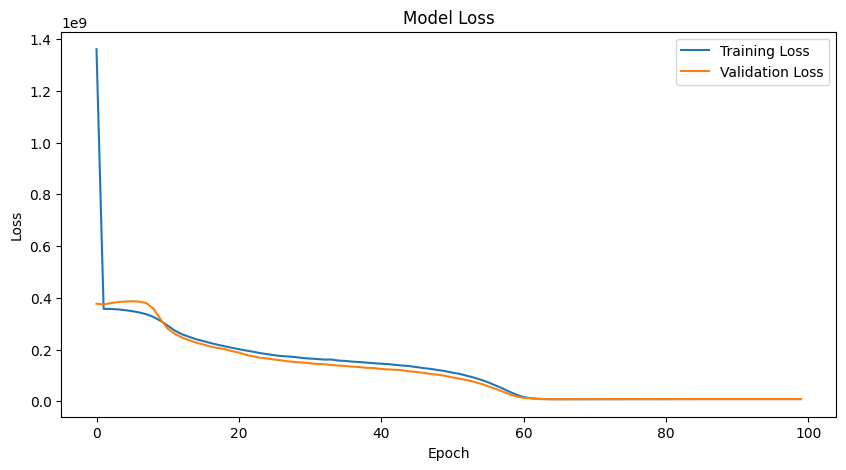

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Membuat DataFrame untuk hasil prediksi
y_pred_df = pd.DataFrame(y_pred, index=test.index, columns=['Penjualan'])

# Menampilkan DataFrame hasil prediksi dengan indeks tanggal
y_pred_df.head()

,Penjualan
Tanggal,
2021-01-01 00:00:00,100780.023438
2021-01-01 10:00:00,100361.937500
2021-01-01 20:00:00,100057.515625
2021-01-02 06:00:00,100708.437500
2021-01-02 16:00:00,100372.742188


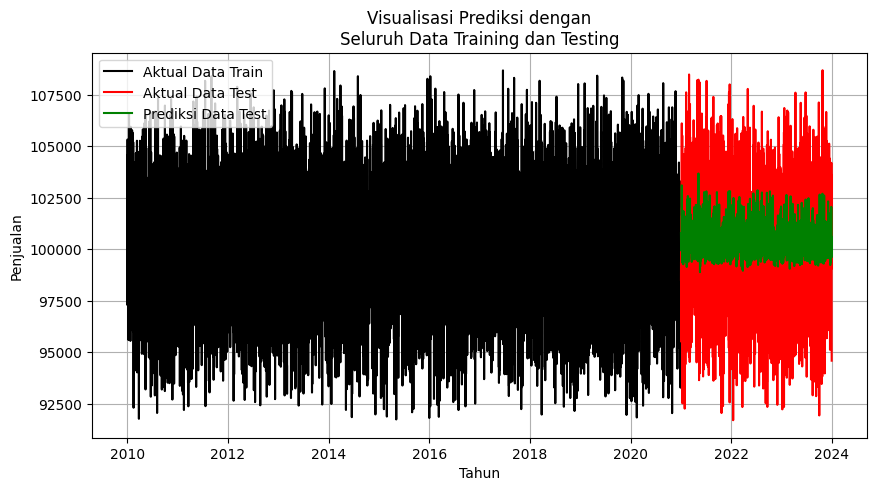

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_train, color = "black", label="Aktual Data Train")
plt.plot(y_test, color = "red", label="Aktual Data Test")
plt.plot(y_pred_df, color = "green", label="Prediksi Data Test")

# title and axis captions
plt.title("Visualisasi Prediksi dengan\nSeluruh Data Training dan Testing")
plt.ylabel("Penjualan")
plt.xlabel('Tahun')

plt.grid()
plt.legend()

plt.show()

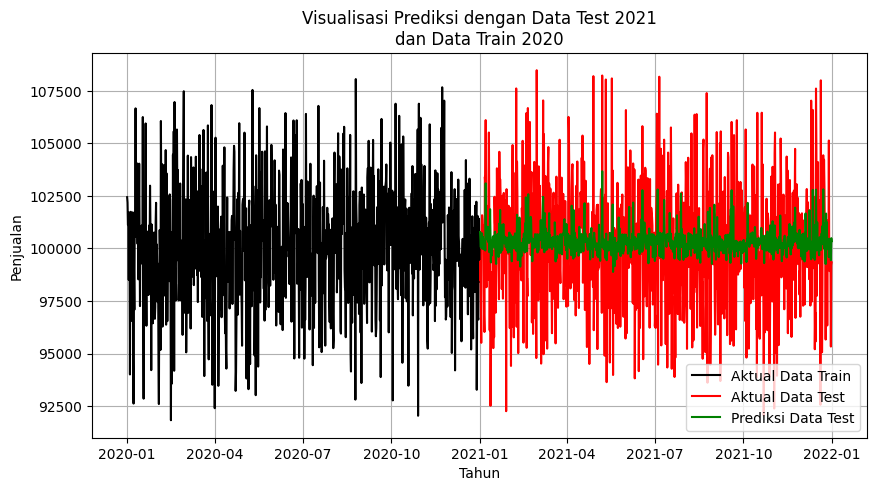

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_train['2020-01-01 00:00:00':], color = "black", label="Aktual Data Train")
plt.plot(y_test[:'2021-12-31 23:59:59'], color = "red", label="Aktual Data Test")
plt.plot(y_pred_df[:'2021-12-31 23:59:59'], color = "green", label="Prediksi Data Test")

# title and axis captions
plt.title("Visualisasi Prediksi dengan Data Test 2021\ndan Data Train 2020")
plt.ylabel("Penjualan")
plt.xlabel('Tahun')

plt.grid()
plt.legend()

plt.show()

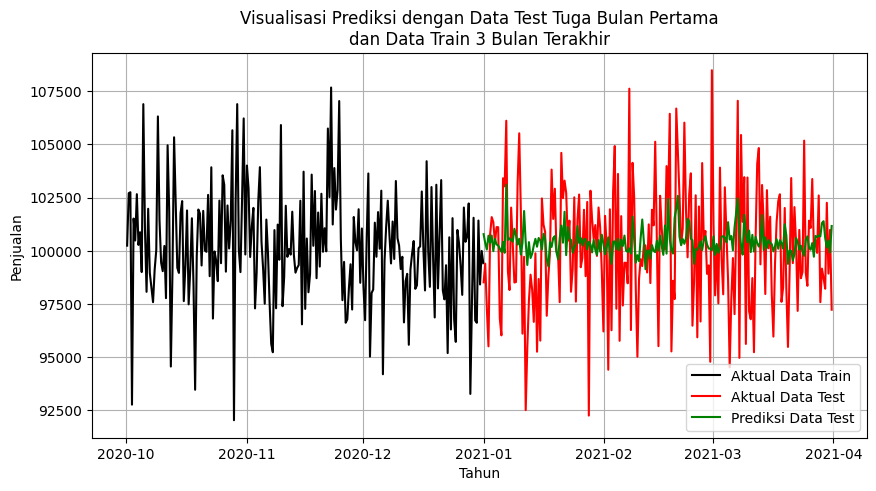

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_train['2020-10-01 00:00:00':], color = "black", label="Aktual Data Train")
plt.plot(y_test[:'2021-03-31 23:59:59'], color = "red", label="Aktual Data Test")
plt.plot(y_pred_df[:'2021-03-31 23:59:59'], color = "green", label="Prediksi Data Test")

# title and axis captions
plt.title("Visualisasi Prediksi dengan Data Test Tuga Bulan Pertama\ndan Data Train 3 Bulan Terakhir")
plt.ylabel("Penjualan")
plt.xlabel('Tahun')

plt.grid()
plt.legend()

plt.show()

In [ ]:
# calculate MSE
print('MSE = ', mean_squared_error(y_test, y_pred))

# and RMSE
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) *  100
print('MAPE =', mape)

MSE =  7764224.950122462
RMSE =  2786.4358865982294
MAPE = 2.2345521279226253
